<a href="https://colab.research.google.com/github/UtkarshAIITB/IPL-Data-Analysis/blob/main/Week1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [436]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [437]:
mt = pd.read_csv('matches.csv')                    #reading the dataset
mt.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Pre-processing of Data

In [438]:
mt.columns                            #printing columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [439]:
print(mt.shape)
mt.info()
#date is an object, not datetime function

(756, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-

In [440]:
mt.isnull().sum()
#umpire 3 has a lot of null values, dropping that column

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [441]:
df = mt.drop(columns = ['umpire3'])
null_city = df[df['city'].isna()]

df = dropped column dataset
mt = original dataset

In [442]:
null_city

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


In [443]:
sub = 'Dubai International Cricket Stadium'
print(df['venue'].str.find(sub).value_counts())
#This confirms only 7 rows have Dubai International Cricket Stadium which have city = NaN

-1    749
 0      7
Name: venue, dtype: int64


In [444]:
df['city'].fillna('Dubai', inplace = True)
df.isnull().sum()
#city null values removed

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

Dropping rows which don't have any winner

In [445]:
winner_null = df[df['winner'].isna()]
winner_null
#winner and playerofmatch are missing at same

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [446]:
df = df[df['winner'].notna()]
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

Checking umpire null values

In [447]:
umpire_null = df[df['umpire1'].isna()]
umpire_null
#umpire 1 and umpire 2 have null values at same rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [448]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,752.000000,752.00000,752.000000,752.000000,752.000000
mean,1784.746011,2013.43617,0.025266,13.353723,3.368351
std,3455.152925,3.36761,0.157036,23.513486,3.388114
min,1.000000,2008.00000,0.000000,0.000000,0.000000
25%,188.750000,2011.00000,0.000000,0.000000,0.000000
50%,377.500000,2013.00000,0.000000,0.000000,4.000000
75%,566.250000,2016.00000,0.000000,19.000000,6.000000
max,11415.000000,2019.00000,1.000000,146.000000,10.000000


In [449]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [450]:
df['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

**Replacing:** <br>
'Rising Pune Supergiant' = 'Rising Pune Supergiants' = 'Pune Warriors' <br>
'Delhi Daredevils' = 'Delhi Capitals' <br>


In [451]:
df['team1'] = df['team1'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
df['team2'] = df['team2'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
df['winner'] = df['winner'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
df['toss_winner'] = df['toss_winner'].replace(['Rising Pune Supergiant' , 'Rising Pune Supergiants', 'Delhi Daredevils'], ['Pune Warriors' , 'Pune Warriors', 'Delhi Capitals'])
print(df['team1'].unique())
print(df['team2'].unique())
print(df['winner'].unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Pune Warriors'
 'Royal Challengers Bangalore' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Kings XI Punjab' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Kochi Tuskers Kerala']
['Royal Challengers Bangalore' 'Pune Warriors' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Capitals' 'Sunrisers Hyderabad' 'Mumbai Indians'
 'Gujarat Lions' 'Rajasthan Royals' 'Chennai Super Kings'
 'Deccan Chargers' 'Kochi Tuskers Kerala']
['Sunrisers Hyderabad' 'Pune Warriors' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Delhi Capitals' 'Gujarat Lions' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [452]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune Warriors,Pune Warriors,field,normal,0,Pune Warriors,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [453]:
# df['date'].unique()
df['date'] = pd.to_datetime(df['date'])
df.info()                                          #dtype of date becomes a datetime object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               752 non-null    int64         
 1   season           752 non-null    int64         
 2   city             752 non-null    object        
 3   date             752 non-null    datetime64[ns]
 4   team1            752 non-null    object        
 5   team2            752 non-null    object        
 6   toss_winner      752 non-null    object        
 7   toss_decision    752 non-null    object        
 8   result           752 non-null    object        
 9   dl_applied       752 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      752 non-null    int64         
 12  win_by_wickets   752 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            752 non-null    object   

# Encoding

'toss_decision' can be hot encoded <br>
'result' can be label encoded due to a heirarchial presence <br>
'dl_applied' is already encoded


In [454]:
df['toss_decision'].value_counts()
# toss-decision can be hot encoded

field    460
bat      292
Name: toss_decision, dtype: int64

In [455]:
df['result'].value_counts()     
#one hot encoding      

normal    743
tie         9
Name: result, dtype: int64

No result value was removed from dataframe and hence for result too we have only two values: normal and tie, thus one hot encoding can be applied over it

In [456]:
#importing required libraries for encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [457]:
dummy_td = pd.get_dummies(df.toss_decision)
dummy_td.head()

,bat,field
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [458]:
df = pd.concat([df, dummy_td], axis = 'columns')
# df.head()
df=df.drop(columns = ['toss_decision', 'bat'])
df.head()
#hot encoded the toss_decision : field and bat

,id,season,city,date,team1,team2,toss_winner,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,field
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune Warriors,Pune Warriors,normal,0,Pune Warriors,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,1
3,4,2017,Indore,2017-04-08,Pune Warriors,Kings XI Punjab,Kings XI Punjab,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,0


In [459]:
dummy_res = pd.get_dummies(df.result)       # normal and tie = two columns
df = pd.concat([df, dummy_res], axis = 'columns')
# df.head()
df=df.drop(columns = ['result', 'tie'])
df.head()

,id,season,city,date,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,field,normal
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune Warriors,Pune Warriors,0,Pune Warriors,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,1,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,1,1
3,4,2017,Indore,2017-04-08,Pune Warriors,Kings XI Punjab,Kings XI Punjab,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,1,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,0,1


In [460]:
df.shape #perfect

(752, 17)

# EDA

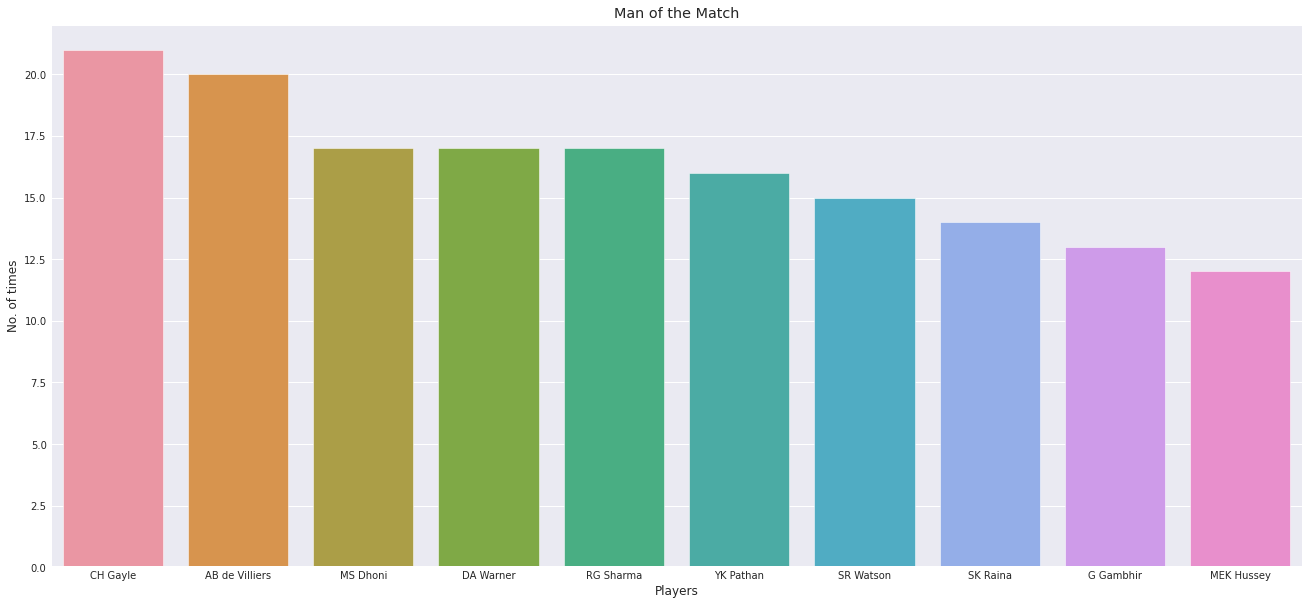

In [461]:
mom = df['player_of_match'].value_counts()[:10].rename_axis('Name').reset_index(name='count')
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
sns.barplot(x = mom['Name'], y = mom['count'], dodge=False)
plt.xlabel('Players')
plt.ylabel('No. of times')
plt.title('Man of the Match')
plt.show()

Chris Gayle followed by AB de Villiers have the largest number of MoM

In [462]:
df.head()

,id,season,city,date,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,field,normal
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,1,1
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune Warriors,Pune Warriors,0,Pune Warriors,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,1,1
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,1,1
3,4,2017,Indore,2017-04-08,Pune Warriors,Kings XI Punjab,Kings XI Punjab,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,1,1
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,0,1


In [463]:
mw = df['winner'].value_counts().rename_axis('Team').reset_index(name='wins')
mw

,Team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Pune Warriors,27


In [464]:
df['winner'].value_counts()[:1]
#printing the best

Mumbai Indians    109
Name: winner, dtype: int64

In [465]:
win = pd.DataFrame()
year = []
for i in range(2008, 2019):
  ss = df[df.season == i]
  win = pd.concat([win , ss['winner'].value_counts()[:1].rename_axis('Team').reset_index(name='wins')], axis = 'rows')
  year.append([i])
yr = pd.DataFrame(year , columns = ['Year'])
yr.reset_index(drop=True, inplace=True)
win.reset_index(drop=True, inplace=True)
win = pd.concat([win, yr], axis = 'columns', )
win

,Team,wins,Year
0,Rajasthan Royals,13,2008
1,Delhi Capitals,10,2009
2,Mumbai Indians,11,2010
3,Chennai Super Kings,11,2011
4,Kolkata Knight Riders,12,2012
5,Mumbai Indians,13,2013
6,Kings XI Punjab,12,2014
7,Mumbai Indians,10,2015
8,Sunrisers Hyderabad,11,2016
9,Mumbai Indians,12,2017


In [466]:
# fig_dim = (22,15)
# fig, ax = plt.subplots(figsize = fig_dim)
# sns.barplot(x = win['Team'], y = win['wins'], hue = win['Year'])

# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value
#         patch.set_width(new_value)
#         patch.set_x(patch.get_x() + diff * .5)

# change_width(ax, 0.35)
# plt.xlabel('Teams')
# plt.ylabel('Matches Won')
# plt.show()

In [467]:
win["Year"] = win["Year"].astype(str)
figa = px.bar(win, x = 'Team', y='wins', color = 'Year', title = 'Max Matches won each year team-wise')
figa.show()

In [468]:
len(df['venue'].unique())
#41 different stadiums, not reliable to plot these, therefore plot for cities.

41

In [469]:
host = df['city'].value_counts()[:15].rename_axis('City').reset_index(name='Match')
# plt.figure(figsize=(8,8))
# plt.pie(host['Match'], labels = host['City'], wedgeprops={'edgecolor':'black'}, autopct='%1.1f%%')
# plt.tight_layout()
# plt.show()
fig = px.pie(host, values = 'Match', names = 'City', title = 'Top 15 Hosting Cities')
fig.show()

Mumbai hosted the maximum number of matches followed by Kolkata

In [470]:
toss_win  = df['toss_winner'].value_counts().rename_axis('Team').reset_index(name='Toss_wins')
total_games = df['team1'].value_counts()+df['team2'].value_counts()
total_games = total_games.rename_axis('Team').reset_index(name='Total_Matches').sort_values('Total_Matches', ascending = False).reset_index().drop(columns = 'index')
toss = pd.merge(toss_win, total_games, on ='Team')
toss = pd.merge(toss, mw, on='Team')
toss['Percent_Tosswin'] = (toss['Toss_wins']/ toss['Total_Matches']) * 100
toss['Percent_wins'] = (toss['wins']/toss['Total_Matches'])*100
toss = toss.sort_values('Percent_wins', ascending = False).reset_index().drop(columns = 'index')


import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(x=toss['Team'],
                y=toss['Percent_wins'],
                name='Percent_wins',
                ))
fig.add_trace(go.Bar(x=toss['Team'],
                y=toss['Percent_Tosswin'],
                name='Percent_Tosswin',
                ))
fig.update_layout(barmode='group',
                  bargap=0.15,                 # gap between bars of adjacent location coordinates.
                  bargroupgap=0.0,             # gap between bars of the same location coordinate.
                  title_text = 'Comparison of wins and toss percentage'
                  )
fig.show()

1. Luckiest team : Deccan Chargers but they don't have that high percentage of wins, whereas KKR has same perecentage of wins and toss wins.
2. Half of the teams have percent wins > percent tosswin whereas reverse for the other half of the teams.

In [471]:
df.tail()

,id,season,city,date,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,field,normal
751,11347,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,1,1
752,11412,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,0,1
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,1,1
754,11414,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,1,1
755,11415,2019,Hyderabad,2019-12-05,Mumbai Indians,Chennai Super Kings,Mumbai Indians,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,0,1
